Надо добавить свой токен с kaggle

In [8]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~ / kaggle / kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
chmod: cannot access 'kaggle': No such file or directory


In [9]:
! kaggle datasets download -d muoncollider/danbooru2020small

100% 5.16G/5.17G [01:41<00:00, 42.7MB/s]
100% 5.17G/5.17G [01:41<00:00, 54.5MB/s]


In [10]:
! unzip danbooru2020small.zip -d danbooru2020small

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: danbooru2020small/images/0010/2763010.jpg  
  inflating: danbooru2020small/images/0010/2764010.jpg  
  inflating: danbooru2020small/images/0010/2765010.jpg  
  inflating: danbooru2020small/images/0010/2767010.jpg  
  inflating: danbooru2020small/images/0010/2768010.jpg  
  inflating: danbooru2020small/images/0010/2769010.jpg  
  inflating: danbooru2020small/images/0010/2770010.jpg  
  inflating: danbooru2020small/images/0010/277010.jpg  
  inflating: danbooru2020small/images/0010/2771010.jpg  
  inflating: danbooru2020small/images/0010/2772010.jpg  
  inflating: danbooru2020small/images/0010/2773010.jpg  
  inflating: danbooru2020small/images/0010/2774010.jpg  
  inflating: danbooru2020small/images/0010/2776010.jpg  
  inflating: danbooru2020small/images/0010/2777010.jpg  
  inflating: danbooru2020small/images/0010/2778010.jpg  
  inflating: danbooru2020small/images/0010/2779010.jpg  
  inflating: danbooru

In [11]:
from IPython.display import Image

import pandas as pd
import numpy as np
import random
import json
import os

In [37]:
images_name = os.listdir("/content/danbooru2020small/images/")

In [73]:
from IPython.display import Image
import random

def image(image_name):
  return Image('/content/danbooru2020small/images/' + image_name)


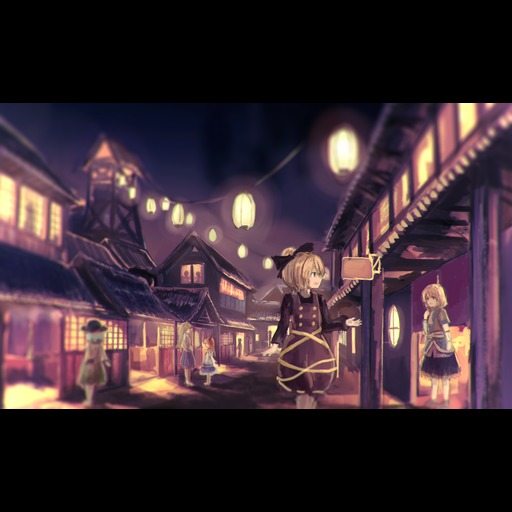

In [89]:
image(random.choice(images_name))

Это метаданные для большого набора, нужно почистить или 

In [91]:
# metadata = []

# for i in range(16):
#   with open('/content/danbooru2020small/metadata/20200000000000' + ('0' + str(i) if i < 9 else str(i)) + '.json') as json_file:
#     for line in json_file:
#       metadata.append(json.loads(line))

In [14]:
metadata = []

with open('/content/danbooru2020small/metadata/2020000000000000.json') as json_file:
  for line in json_file:
    metadata.append(json.loads(line))

json_normalize - json данные в таблицу

In [15]:
df = pd.json_normalize(metadata)
df.size

7975920

In [102]:
df.head(5)

,id,created_at,uploader_id,score,source,md5,last_commented_at,rating,image_width,image_height,is_note_locked,file_ext,last_noted_at,is_rating_locked,parent_id,has_children,approver_id,file_size,is_status_locked,up_score,down_score,is_pending,is_flagged,is_deleted,updated_at,is_banned,pixiv_id,tags,pools,favs
0,263202,2008-06-10 05:02:00.47851 UTC,65792,2,,eb72147a1fa488f5d1e8a1ca7fb6d413,1970-01-01 00:00:00 UTC,s,1042,1024,False,jpg,1970-01-01 00:00:00 UTC,False,0,False,1309,341600,False,2,0,False,False,False,2014-08-29 23:40:28.9035 UTC,False,0,"[{'id': '1821', 'name': '2girls', 'category': ...",[],"[15115, 34355, 230406, 55507]"
1,3014637,2018-02-09 02:38:41.99135 UTC,526080,4,https://twitter.com/mayonaka_reiji/status/9507...,29698cf3aa9e850e0378b03dc022a757,2018-02-09 20:09:23.37892 UTC,s,1191,1684,False,jpg,1970-01-01 00:00:00 UTC,False,0,False,0,183225,False,5,-1,False,False,True,2018-07-18 05:00:58.4292 UTC,False,0,"[{'id': '1409425', 'name': '0:00', 'category':...",[],"[19831, 467355, 60223, 352442, 91474]"
2,2872191,2017-09-29 02:25:16.2065 UTC,528640,3,https://i.pximg.net/img-original/img/2016/11/2...,34e69454c51760213e8fc5c9ffabcbd3,1970-01-01 00:00:00 UTC,s,756,869,False,jpg,1970-01-01 00:00:00 UTC,False,2872187,False,23580,309434,False,3,0,False,False,False,2017-09-29 03:35:24.93939 UTC,False,60166605,"[{'id': '470575', 'name': '1girl', 'category':...",[],"[85999, 12082, 467355, 476649]"
3,2873161,2017-09-30 02:50:08.43341 UTC,528640,3,https://i.pximg.net/img-original/img/2016/09/0...,e83a65dd53c82507723c3de96cbfb54b,2017-09-30 02:54:06.66263 UTC,s,537,562,False,jpg,2017-09-30 02:50:50.92449 UTC,False,0,False,0,162563,False,3,0,False,False,True,2017-09-30 02:54:20.75027 UTC,False,58848746,"[{'id': '1821', 'name': '2girls', 'category': ...",[],"[104056, 467363, 439955, 414276, 467355]"
4,2872175,2017-09-29 02:01:49.91294 UTC,528640,4,https://i.pximg.net/img-original/img/2017/07/1...,c914d6b15ffa5f91f0e9e8a7f10ad25e,1970-01-01 00:00:00 UTC,s,868,1228,False,jpg,1970-01-01 00:00:00 UTC,False,0,False,23580,129002,False,4,0,False,False,False,2017-09-29 03:35:20.04609 UTC,False,63897756,"[{'id': '470575', 'name': '1girl', 'category':...",[],"[505064, 467355, 445158, 515301, 60223]"


In [142]:
100 / 8.333

12.000480019200769

In [144]:
year = df['created_at'].apply(lambda x: float(x.split('-')[0]) + float(x.split('-')[1]) / 12.0001)
year

0         2008.499996
1         2018.166665
2         2017.749994
3         2017.749994
4         2017.749994
             ...     
265859    2015.249998
265860    2014.333331
265861    2010.249998
265862    2013.416663
265863    2019.999992
Name: created_at, Length: 265864, dtype: float64

In [146]:
df['year'] = year 

In [ ]:
df.insert(loc=len(df.columns), column="year", value=year)

In [147]:
print(df.columns.tolist())
df[["score", "up_score", "down_score", 
    "image_width", "image_height", "file_size"]] = df[["score", "up_score", "down_score", "image_width", "image_height", "file_size"]].apply(pd.to_numeric)
df.dtypes

['id', 'created_at', 'uploader_id', 'score', 'source', 'md5', 'last_commented_at', 'rating', 'image_width', 'image_height', 'is_note_locked', 'file_ext', 'last_noted_at', 'is_rating_locked', 'parent_id', 'has_children', 'approver_id', 'file_size', 'is_status_locked', 'up_score', 'down_score', 'is_pending', 'is_flagged', 'is_deleted', 'updated_at', 'is_banned', 'pixiv_id', 'tags', 'pools', 'favs', 'year']


id                    object
created_at            object
uploader_id           object
score                  int64
source                object
md5                   object
last_commented_at     object
rating                object
image_width            int64
image_height           int64
is_note_locked          bool
file_ext              object
last_noted_at         object
is_rating_locked        bool
parent_id             object
has_children            bool
approver_id           object
file_size              int64
is_status_locked        bool
up_score               int64
down_score             int64
is_pending              bool
is_flagged              bool
is_deleted              bool
updated_at            object
is_banned               bool
pixiv_id              object
tags                  object
pools                 object
favs                  object
year                 float64
dtype: object

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

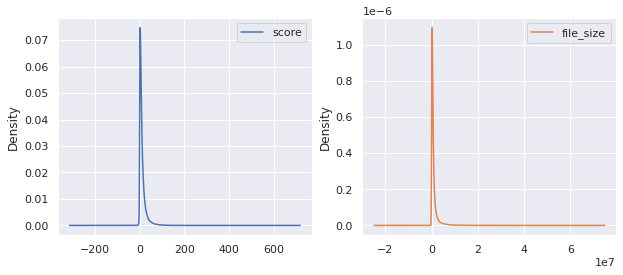

In [100]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


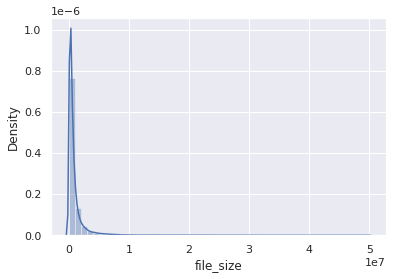

In [101]:
sns.distplot(df["file_size"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


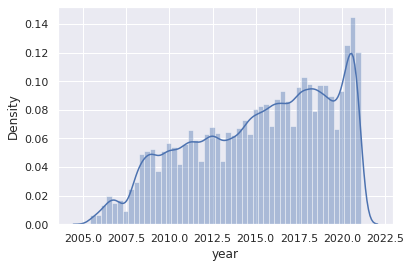

In [153]:
sns.distplot(df["year"]);

In [106]:
df.describe()

,score,image_width,image_height,file_size,up_score,down_score
count,265864.000000,265864.000000,265864.000000,2.658640e+05,265864.000000,265864.000000
mean,11.262142,1141.553159,1354.974589,9.521573e+05,10.279786,-0.127543
std,15.602788,779.413375,965.241638,1.729302e+06,15.195720,0.579824
min,-56.000000,0.000000,0.000000,1.170000e+03,0.000000,-56.000000
25%,3.000000,676.000000,800.000000,2.116845e+05,2.000000,0.000000
50%,7.000000,900.000000,1043.000000,4.551145e+05,5.000000,0.000000
75%,14.000000,1288.000000,1516.000000,9.591965e+05,12.000000,0.000000
max,461.000000,17875.000000,29300.000000,4.981628e+07,467.000000,1.000000


In [107]:
df["rating"].value_counts()

s    204994
q     37748
e     23122
Name: rating, dtype: int64

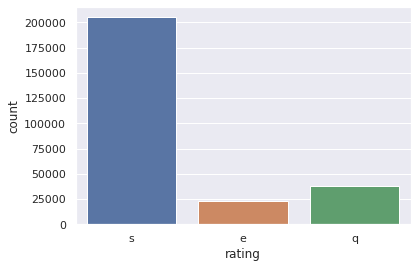

In [112]:
_, axes = plt.subplots(figsize=(6, 4))

sns.countplot(x="rating", data=df)

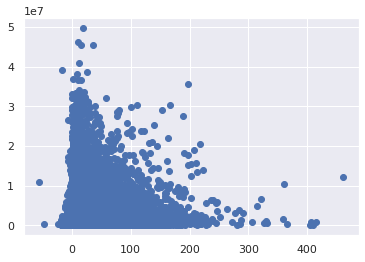

In [116]:
plt.scatter(df["score"], df["file_size"]);

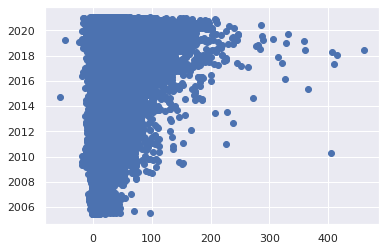

In [149]:
plt.scatter(df["score"], df["year"]);

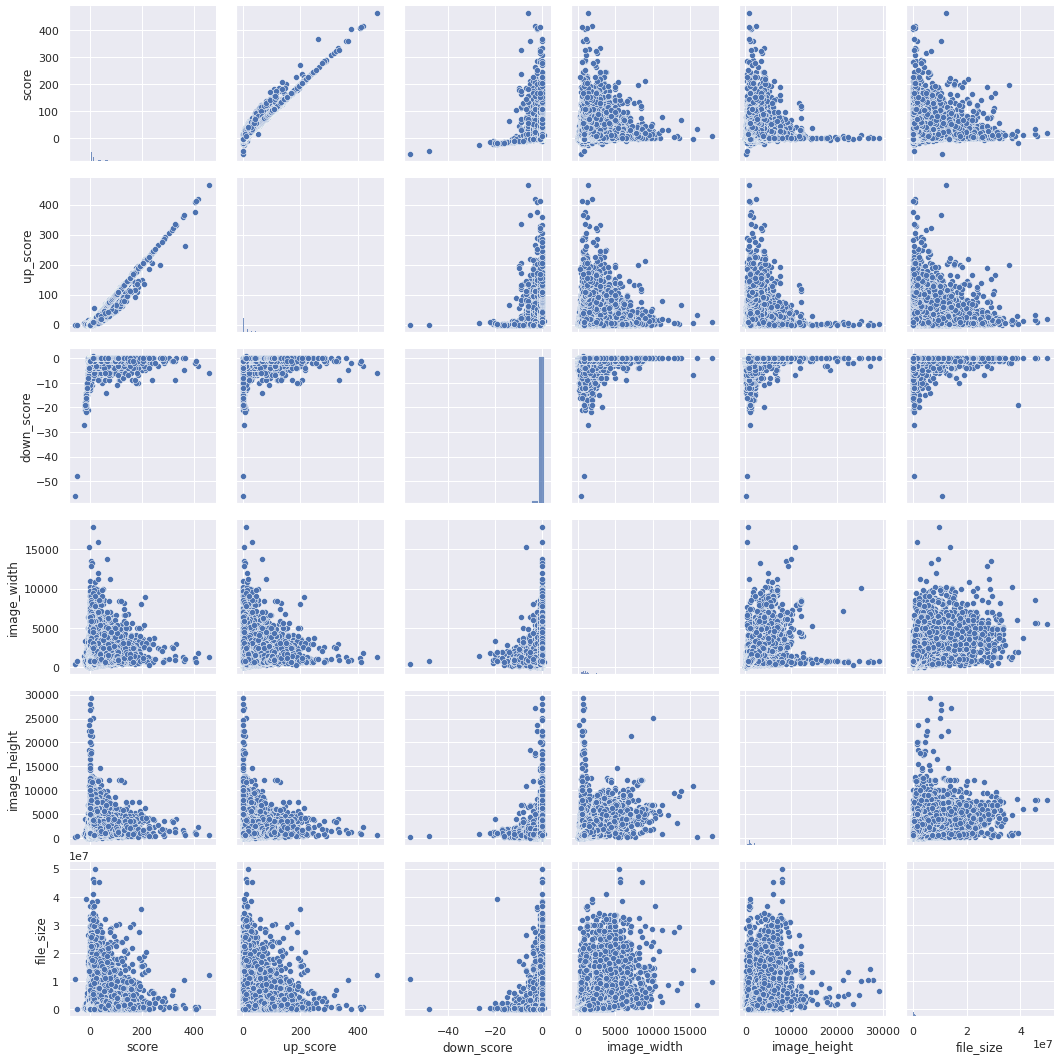

In [120]:
numerical = ["score", "up_score", "down_score", "image_width", "image_height", "file_size", "year"]

%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

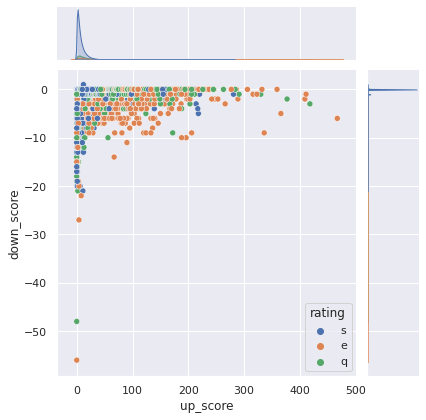

In [18]:
sns.set_theme()

sns.jointplot(data=df, x="up_score", y="down_score", hue="rating")

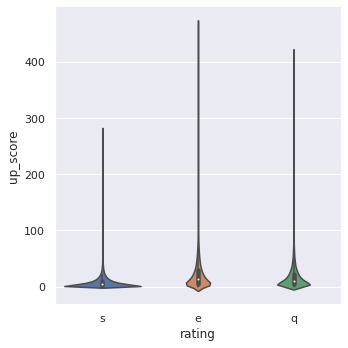

In [19]:
sns.catplot(data=df, kind='violin', x="rating", y="up_score")